#### UNS LEARNING find patterns in data (clustering & dimension reduction(PCA Y NMF)

In [27]:
from sklearn import datasets
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### CLUSTERING

In [24]:

# Create feature arrays. No necesitamos una variable target
X = iris.data

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(X)

# Determine the cluster labels of X_test: labels
labels = model.predict(X)

# Print cluster labels of new_points
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


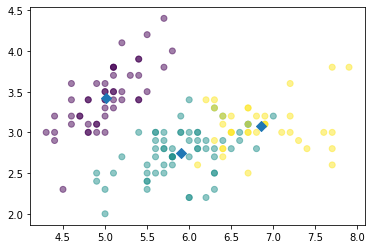

In [25]:
# Import pyplot
from matplotlib import pyplot as plt

# Assign the columns of X_test: xs and ys
xs = X[:,0]
ys = X[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

#### EVALUATING THE QUALITY OF A CLUSTERING

In [ ]:
#### podemos comparar los clusters con las iris species con cross tabulation(no siempre vamos a tener la variables target)

In [29]:
iris = datasets.load_iris()
y = iris.target
X = iris.data

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(X)

# Determine the cluster labels of X_test: labels
labels = model.predict(X)


df= pd.DataFrame({'labels': labels, 'species': y})
ct=pd.crosstab(df['labels'], df['species'])
ct

species,0,1,2
labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


#### esto no siempre es posible para evaluar la calidad de los clusters dado que no tenemos la variable target.
#### Entonces, como medimos la calidad del clustering???

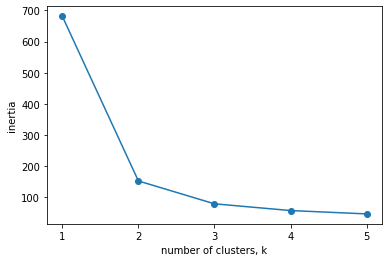

In [31]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [32]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with clusters and varieties as columns: df
df= pd.DataFrame({'labels': labels, 'species': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species   0   1   2
labels             
0         0  48  14
1        50   0   0
2         0   2  36


#### TRANSFORMING FEATURES FOR BETTER CLUSTERINGS

In [59]:
#importamos database ( 178 registros con 3 variedades de vino)
df_wine = pd.read_csv(r'C:\Users\Mumes\Desktop\wine.csv', header = None)

# Creamos features and varieties arrays. 
X = df_wine.drop(0, axis=1).values ### 0 es la variable varieties.La eliminamos de las features
y = df_wine[0].values
y.shape

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with clusters and varieties as columns: df
df= pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   1   2   3
labels               
0           0  50  19
1          46   1   0
2          13  20  29


In [61]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [62]:

# Fit the pipeline to samples
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

# Create a DataFrame with labels and species as columns: df
df= pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   1   2   3
labels               
0          59   3   0
1           0   3  48
2           0  65   0


In [68]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=3)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

# Create a DataFrame with labels and species as columns: df
df= pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

# Display df sorted by cluster label
print(df.sort_values('labels'))

varieties   1   2   3
labels               
0          51   5   4
1           0  33   4
2           8  33  40
     labels  varieties
0         0          1
35        0          1
36        0          1
37        0          1
38        0          1
..      ...        ...
116       2          2
72        2          2
112       2          2
4         2          1
177       2          3

[178 rows x 2 columns]


#### Visualization with hierarchical clustering (dendogram) and t-SNE

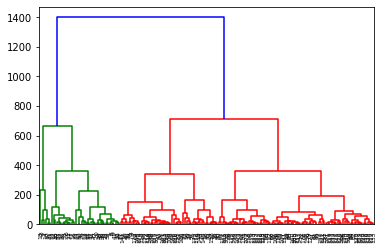

In [71]:
#importamos database ( 178 registros con 3 variedades de vino)
df_wine = pd.read_csv(r'C:\Users\Mumes\Desktop\wine.csv', header = None)

# Creamos features and varieties arrays. 
X = df_wine.drop(0, axis=1).values ### 0 es la variable varieties.La eliminamos de las features
y = df_wine[0].values

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(X, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           #labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


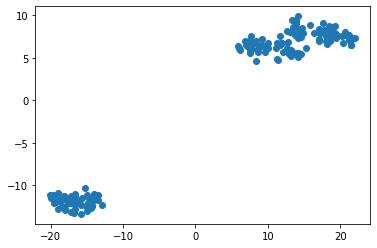

In [73]:
iris = datasets.load_iris()
X = iris.data

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys)
plt.show()


#### DIMENSION REDUCTION

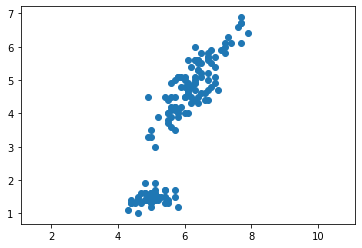

0.8717537758865831


In [78]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

iris = datasets.load_iris()
X = iris.data

# Assign the 0th column: width
width = X[:,0]

# Assign the 2nd column: length
length = X[:,2]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

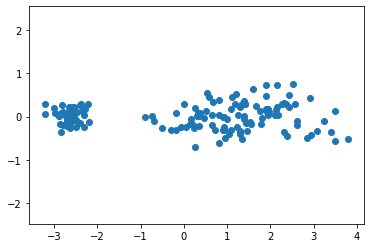

1.222980050563649e-16


In [79]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(X)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,2]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

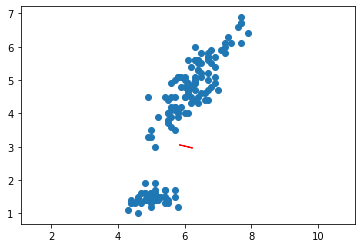

In [81]:
# INTRINSIC DIMENSION> plot the variance of PCA features> intrinsic dimension guia a la reduces dimension

# Make a scatter plot of the untransformed points
plt.scatter(X[:,0], X[:,2])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(X)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

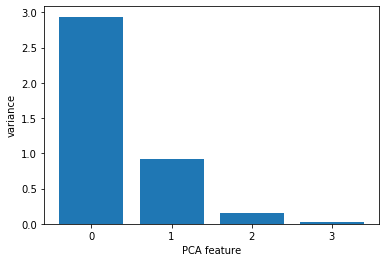

In [82]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [84]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(X)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X)

# Print the shape of pca_features
print(pca_features.shape)


(150, 2)
